<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Automatic-documentation" data-toc-modified-id="Automatic-documentation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Automatic documentation</a></span><ul class="toc-item"><li><span><a href="#Sphinx" data-toc-modified-id="Sphinx-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sphinx</a></span></li></ul></li><li><span><a href="#Sandboxing-&amp;-Virtual-environments" data-toc-modified-id="Sandboxing-&amp;-Virtual-environments-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sandboxing &amp; Virtual environments</a></span></li><li><span><a href="#Code-Testing" data-toc-modified-id="Code-Testing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Code Testing</a></span><ul class="toc-item"><li><span><a href="#What-is-a-test?" data-toc-modified-id="What-is-a-test?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>What is a test?</a></span></li></ul></li><li><span><a href="#Test-Driven-Development" data-toc-modified-id="Test-Driven-Development-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test Driven Development</a></span><ul class="toc-item"><li><span><a href="#Ways-to-implement-tests" data-toc-modified-id="Ways-to-implement-tests-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Ways to implement tests</a></span></li><li><span><a href="#The-doctest-module" data-toc-modified-id="The-doctest-module-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>The <code>doctest</code> module</a></span></li><li><span><a href="#The-unittest-module" data-toc-modified-id="The-unittest-module-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>The <code>unittest</code> module</a></span></li></ul></li><li><span><a href="#Pytest" data-toc-modified-id="Pytest-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Pytest</a></span></li><li><span><a href="#The-many-classes-of-test" data-toc-modified-id="The-many-classes-of-test-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>The many classes of test</a></span></li><li><span><a href="#Continuous-integration" data-toc-modified-id="Continuous-integration-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Continuous integration</a></span></li><li><span><a href="#Extending-CI-tests" data-toc-modified-id="Extending-CI-tests-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Extending CI tests</a></span></li><li><span><a href="#Further-Reading" data-toc-modified-id="Further-Reading-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Further Reading</a></span></li></ul></div>

# Automated Testing & Continuous Integration

<div class= info>
    
<p>Yesterday:
<ul>
    <li>Copyright & the Github Flow</li>
</ul></p>

<p>In this lecture:
<ul>
    <li>Automatic Documentation Generation</li>
    <li>Virtual Environments</li>
    <li>Code Testing</li>
    <li>Automated testing frameworks</li>
    <li> Continous Integration & Travis-ci.com</li>
</ul></p>
 
<p>Next Week:
<ul>
    <li>Wednesday: Course Q&A with Nicolas Barral</li>
</ul>
</p>

</div>

<div class= warn>

<h4>Contact details:</h4>

<ul><li>Dr. James Percival</li>
    <li> 4.85 RSM building</li>
    <li> j.percival@imperial.ac.uk</li>
    <li> Slack: <code>@James Percival</code> in #General & #Random, or DM me.</li>
</ul>

</div>

#### By the end of this lecture you should:
 - Understand the basics of code testing and ways to automate it.
 - Understand the different sorts of test.
 - Have experience of Continuous Integration via [Travis-CI.com]()
 

## Automatic documentation

Documentation is written for three broad groups of people:

1. Users ("I don't care how it does it, I care what it does.")
1. User-Developers ("I build what I need.")
1. Developers ("I make it, I don't use it")

These individuals have different needs from the documentation you provide to them. Users want to know what software can do, and how to run it for their own problems. Developers need to understand how code works, but not necessarily what it's intended for in a wider sense. User-developers need to understand both sides. Commercial software is generally written by pure developers, but a lot of scientific software (and many other small projects) is written by user-developers.

For all groups, the most important piece of documentation in Python is the docstring, since it remains with the code it applies to, and connects to the Python online help. For developers & user-developers, additional comments in the body of the text may also be useful, however users may never look there.

Although it is now generally acknowledged that the best place for living documentation is in the source code, near where it applies, since this gives the best probability of developers updating it in line with changes, it is still useful to maintain a full (electronic) manual, both for ease of reference, and to give a general project overview.

Several tools have been developed to close this gap by automatically collating comments and calling signatures from the source code and converting it into a human readable "manual". Perhaps the most famous opensource cross-language tool is [Doxygen](). However we'll look further at Sphinx, which originated in the Python community and is the tool of choice on several large Python projects including SciPy, Django and [Python itself] (https://docs.python.org/3/about.html) 

### Sphinx

You can install the core tool with the command

```bash
pip install sphinx
```

Sphinx works by converting [reStructured text](http://docutils.sourceforge.net/docs/user/rst/quickstart.html) into html pages or pdf files.

The simplest use pattern is to use the fully automatic scanning tools to collect together all the docstrings into an index of APIs.

This requires creating two files, the first containing the configuration options for the sphinx tool, and the second containing a skeleton reStructured text file into which to slot it:

_`docs/conf.py`_:

```python
import sys
import os

sys.path.insert(0, os.path.abspath(os.sep.join('.','/mycoolproject')))

project = 'MyCoolProject'
extensions = ['sphinx.ext.autodoc']
source_suffix = '.rst'
master_doc = 'index'
exclude_patterns = ['_build']
autoclass_content = "both"
```

_`docs/index.rst`_:

```rst
mycoolproject
=============

This is just example text.

.. automodule:: mycoolproject
  :members:
```


With this setup we can build a `html` version of the documentation with

```bash
sphinx-build docs docs/html
```

<div class= warn>
    
<h4>Warning</h4>

By Microsoft Windows uses `\` as the separator symbol between levels in the directory tree. Meanwhile Linux and Mac OSX use `/`. This makes it almost impossible for notes to give paths that work on both sets of computers. In this section I use the \*nix standard of `/` to match the sphinx documentation. Please remember to convert in your head on a Windows computer.

</div>

If this is successful, you should be able to open `./docs/html/index.html` to see documentation automatically generated from the docstrings in your project. Sphinx also supports other output formats (for example LaTeX) with the `-b` flag. A recipe to generate a `pdf` manual on a suitably configured Linux system is

```bash
sphinx-build -b latex docs .
pdflatex MyCoolProject.tex
pdflatex MyCoolProject.tex
```

which will generate `MyCoolProject.pdf`. We run LaTeX twice to ensure that references and citations (including the index) are set correctly. 


<div class= exercise>

<h4> Exercise: Autodocumenting your module</h4>

<ul><li> Use <code>pip</code> or <code>conda</code> to install <code>sphinx</code> on your computer. </li>
<li> Create a <code>docs</code> directory inside your module and add <code>conf.py</code> and <code>index.rst</code> files based on the ones given above.</li>
<li> Run <code>sphinx-build</code> to generate <code>html</code> documentation for your project.</li>
<li> Try editting the <code>index.rst</code> file to add more text.</li></ul>
    
</div>


## Sandboxing & Virtual environments

There are several situations in which it can be useful to "[sandbox](https://docs.python.org/3.6/library/venv.html)" code into its own space so that other package installations cannot interfere with it, and so that it cannot interfere with them.

 - Sometimes packages have mutually incompatible version dependencies, e.g. package A only works with version 1.1 of package B, while package C needs version 1.2
 - Sometimes packages have the same name, but do different things, creating a namespace clash.
 - Sometimes you need a clean environment to test your package dependencies to write your `requirements.txt` file.
 
Python 3 comes with an [inbuilt library](https://docs.python.org/3.6/library/venv.html) called `venv` which can be used to create so-called "virtual environments". Inside a virtual environment, only the packages and tools you choose are available, at the version numbers you request.

To create a new `venv` environment you can run a command like
```bash
python -m venv foo
```
or, on systems with both Python 2 and Python available,
```bash
python3 -m venv foo
```

This will create a new directory `./foo/` containing the files relevant to that virtual environment. To start the environment on Windows run
```bash
foo\Scripts\activate.bat
```
or on unix shell like systems
```bash
source foo/bin/activate
```

To turn it off again, run
```bash
.\foo\Scripts\deactivate.bat
```
on Windows or just type
```bash
deactivate
```
on most other shells.

<div class= exercise>

<h4>Exercise</h4>
<p>Create your own <code>venv</code> environment, giving it a name of your choice. Activate it. Note the difference it makes to your command prompt.</p>

<p>Double check the linstalled package list using <code>pip list</code>. Install a package into the virtual environment (such as <code>matplotlib</code>) using <code>pip</code>. Check that the list of installed packages inside the environment changes.</p>

<p>Install the package you wrote into your virtual environment. </p>

</div>

## Code Testing

When writing software, especially scientific software, a key question is whether the code is correct, and provably correct. How do we check something for correctness? We test.

### What is a test?

The simplest kind of test is the ad hoc kind you run when hacking about with code. If I have created a new function `add(x, y)` which adds together two numbers and returns the result, then it might be a good idea to try something like
```python
print(add(1, 0) == 1)
print(add(1, 1) == 2)
```
This can't catch every possible mode of failure. For example, an `add` defined function like
```python
def add(x, y):
    return x**2+y**2
```
would pass both the tests given above, despite not being returning `x+y`.

The examples above are both examples of "testing to pass", in that we have written a statement we expect to return true, and will be happy if it does so. One important thing to check is that operations you expect to raise an exception error actually do so (i.e. testing to fail). There are usually ways of writing a test to fail as a test to pass if needed. E.g. for a `divide` operator:


In [1]:
def divide(x, y):
    """return x divided by y."""
    return x/y


## Check we get an error when dividing by zero.
try:
    divide(1, 0)
    print(False)
except ZeroDivisionError:
    print(True)

True


By writing our tests like this we can use an operator like `assert()` to turn the test from raising an exception if when it does what we want into raising an exception if it doesn't.

## Test Driven Development

The most extreme version of this philosopy is strict Test Driven Development (TDD), sometimes also called "Red-Green" testing. Here the idea is that when implementing new code *first* you write a test, ensuring that it fails (red), then *second* you write just enough code to pass the test you've writen (green). Finally you [refactor]() (i.e. rewrite) any code you believe can be improved (simplified or speeded up), _while ensuring that your existing tests pass or are fixed_. 

This is intended to be an iterative process, so once you are done with one test, you move on to the next. Let's have an example, pushing things as far as they can go:

__Problem__: Write a function that returns the repeated elements in a list.

So, first, we write a test.

```python
assert(f([0, 1, 1]) == 1)
```

Does it fail on a do nothing implementation?

In [2]:
def f(x):
    """Return the repeated elements in a list."""
    pass


print(f([0, 1, 1]) == 1)

False


Ok, our test is failing, let's actually write some code. A quick way to catch repeated elements is to use a set.

In [3]:
def f(x):
    """Return the repeated elements in a list."""
    vals = set()
    for _ in x:
        if _ in vals:
            return _
        else:
            vals.add(_)


print(f([0, 1, 1]) == 1)

True


Our test is now passing. There's no old code to improve, so we either write another test, or move on. Let's try having a couple of repeated elements
```python
f([0,1,1,0]) == [0,1]
```

In [4]:

print(f([0, 1, 1]) == 1)
print(f([0,1,1,0]) == [0,1])

True
False


In [5]:
def f(x):
    """Return the repeated elements in a list."""
    vals = set()
    out = []
    for _ in x:
        if _ in vals:
            out.append(_)
        else:
            vals.add(_)
    return sorted(out)


print(f([0, 1, 1]) == 1)
print(f([0, 1, 1, 0]) == [0, 1])

False
True


We've broken the first test. But it's actually the test which is bad, so we'll fix it.

In [6]:
print(f([0, 1, 1]) == [1])
print(f([0, 1, 1, 0]) == [0,1])

True
True


Ok. Another iteration. What about if an element turns up 3 times?

In [7]:
print(f([0, 1, 1, 0, 0]) == [0, 1])
print(f([0, 1, 1, 0, 0]))

False
[0, 0, 1]


In [8]:
def f(x):
    """Return the set of repeated elements in a list."""
    vals = set()
    out = set()
    for _ in x:
        if _ in vals:
            out.add(_)
        else:
            vals.add(_)
    return out


print(f([0, 1, 1]) == set([1]))
print(f([0, 1, 1, 0]) == set([0, 1]))
print(f([0, 1, 1, 0, 0]) == set([0, 1]))

True
True
True


And so on. At some point you run out of tests to set and the code is finished.

<div class= exercise>

<h4>Exercise</h4>

<p>Try and write your own attempt at TTD for the following problems:

<ol>
<li><p> Write an implementation of a [fizz buzz](https://en.wikipedia.org/wiki/Fizz_buzz) function. This is a children's game, where players count around a circle in order. 
    <ul>
        <li> However, any number divisible by 3 is replaced by the word "<i>fizz</i>".</li>
        <li> Any number divisible by 5 is replaced by the word "<i>buzz</i>". </li>
        <li> Numbers divisible by both become "<i>fizz buzz</i>".</li>
    </ul></p>

  <p>Your function should accept an integer, x, and return either x, <code>'fizz'</code>, <code>'buzz'</code> or <code>'fizz buzz'</code> according to the rules above.</p></li>
  
<li>Write a program to put the elements of an $n$ dimensional <code>numpy</code> array, $X$, into order of size.
    <ul>
        <li> The code should have output $Y$ with <code>Y[i,...]&lt;[j,...]</code> for all <code>i&lt;j</code>.</li>
        <li> The code should have output $Y$ with <code>Y[k,i..]&lt;[k,j,..]</code> for all <code>i&lt;j</code> and fixed k</li>
        <li> And so on.</li>
        <li> Note that this means when written in the form
<p><code> [[..[x_1, .., x_n], [x_n+1, .., x_2n], .., x_N]]</code></p>
we have <code>x_n&lt; x_n+i</code> for all <code>i&gt;0</code>.</li>
    </ul></li>

<li><p>Write a function to accept or reject a string as a candidate for a password based on the following criteria:
    <ul>
        <li> The string is between 8 and 1024 characters long.</li>
        <li> The string contains a number</li>
        <li> The string contains a capital letter</li>
        <li> The string contains none of the following characters: <code>@&lt;&gt;!</code></li>
    </ul>
</li></ol>

<p>Remember, you should come up with a test first, then write only enough new code to satisfy it, and fix your previous tests, before moving on to another test. Once the test passes, remember to have a look at your code to see if anything needs to be refactored.</p>

<p>The goal here is to concentrate on the TDD process, but for completeness, [model answers](https://msc-acse.github/ACSE-1/lectures/lecture10-solutions.html) are available.</p> 
    
</div>

At this point you can hopefully see that 
1. TDD is a fine ideal for correct software engineering
2. No sane person would write all their tests an that level of detail.

However, there are some important ideas to pull out of the paradigm:

1. Make sure your tests can fail.
2. Consider both the usual and the corner cases.

### Ways to implement tests

Lets have a slighly more concrete example. We'll look for solutions to the quadratic equation
$$ ax^2 + bx + c =0,$$
where $x$ is a real number. The formula for solutions is
$$ x=\frac{-b \pm \sqrt{b^2-4ac}}{2a}.$$
Now to write some code in a module file

In [9]:
import numpy as np # for the sqrt function

def solve_quadratic(a,b,c):
    """Solve a quadratic equation ax^2+bx+c=0 in the reals"""
    if 0<b**2-4.0*a*c:
        # two solutions
        return ((-b-np.sqrt(b**2-4.0*a*c))/(2.0*a),(-b+np.sqrt(b**2-4.0*a*c))/(2.0*a))
    elif 0==b**2-4.0*a*c:
        # one solution
        return -b/(2.0*a)
    else:
        # no solutions
        return None

We can try some ad hoc tests:

In [10]:
# solve x^2-1=0
solve_quadratic(1,0,-1)==(-1.0,1.0)

True

In [11]:
solve_quadratic(1,0,0)==(0.0)

True

In [12]:
solve_quadratic(1,0,1) is None

True

Humans are lazy, so we want to make running tests when the code changes as easy as possible. We could just roll the tests into a single function, and use the `assert()` function so that it throws an exception if anything goes wrong.

In [13]:
def test_solve_quadratic():
    
    assert(solve_quadratic(1,0,-1) == (-1.0,1.0))
    assert(solve_quadratic(1,0,0) == (0.0))
    assert(solve_quadratic(1,0,1) is None)
    
    return 'Tests pass'
    
test_solve_quadratic()

'Tests pass'

In [14]:
test_solve_quadratic()

'Tests pass'

### The `doctest` module

The module [doctest](https://docs.python.org/2/library/doctest.html) from the standard Python library provides a simple way to include code which is both a test and documentation of an example of the use of your code.

To write a test, one simply copies the input and output that one would see _in the vanilla python interpreter_ pretty much identically into a docstring, whether for a function or module.



_docstring_\__test.py:_
```python
import doctest

def mean(x):
    """Mean of a list of numbers.
    
    >>> mean([1, 5, 9)
    5
    
    """
    return sum(x)/len(x)

if __name__ == "__main__":
    import doctest
    doctest.testmod()

```

Run the test by calling the module as a script:
```bash
python3 -m docstring_test
```

If the test suceeds it silently returns a successful exit code. If the test fails (e.g. we replace the out put of 5.0 in the example) then an error message is printed, looking like the following:

```bash
**********************************************************************
File "docstring_test.py", line 6, in __main__.mean
Failed example:
    mean([1, 5, 9])
Expected:
    3.0
Got:
    5.0
**********************************************************************
1 items had failures:
   1 of   1 in __main__.mean
***Test Failed*** 1 failures.
```

Doctests can also be run from plain text files as

```bash
import doctest
doctest.testfile("example.txt")
```

<div class= exercise>

<h4>Exercise:</h4>

<p>Write some tests using the doctest module inside your own module or script.</p>

<ol>
    <li> First write some tests which pass.</li>
    <li> Next write some tests which do not pass.</li>
    <li> Swap your work with another student (why not use github?).</li>
    <li> Fix their failing tests, either by editing the code or changing the tests.</li>
</ol>

<p>You can use some of the modules you wrote earlier in the week, or else write some new code.</p>

</div>

### The `unittest` module

It's still useful to automate things a bit more, so that we can . Python provides an inbuilt `unittest` module, which (with some work) can be used to build a test framework. It introduces the basic concept of the three stages of a test:
1. Set up. We create anything which must already exist for a test to make sense.
2. Running. The test itself operates
3. Tear down. We clean up anything which won't get dealt with automatically

The file `unittest_example.py` contains the following code

```python
import unittest

import numpy as np # for the sqrt function

def solve_quadratic(a,b,c):
    """Solve a quadratic equation ax^2+bx+c=0 in the reals"""
    if 0<b**2-4.0*a*c:
        # two solutions
        return ((-b-np.sqrt(b**2-4.0*a*c))/(2.0*a),(-b+np.sqrt(b**2-4.0*a*c))/(2.0*a))
    elif 0==b**2-4.0*a*c:
        # one solution
        return -b/(2.0*a)
    else:
        # no solutions
        return None

class TestSolveQuadratic(unittest.TestCase):
    def test_solve_quadratic(self):
    
        self.assertEqual(foo.solve_quadratic(1,0,-1), (-1.0,1.0))
        self.assertEqual(foo.solve_quadratic(1,0,0), 0.0 )
        self.assertEqual(foo.solve_quadratic(1,0,1), None)
   
unittest.main()
```

Running the test using the syntax

```bash
python3 unittest_example.py
```

gives the output

```bash  
.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK
```

<div class= exercise>

<h4>Exercise:</h4>

Try this yourself by writing a unittest using the `unittest` module. Try breaking and fixing the test.

</div>

## Pytest

The external `pytest` functions simplifies the actions of writing tests even further, as well as providing a more informative interface. Pytest can be installed with
```bash
pip install pytest
```
which adds a tool of the same name. This tool can be used to run both `doctest`s, (add the `--doctest-modules`) and unit tests based on the unit test module (just leave out the `unittest.main()`), as well as tests in its own format.

We have created a [GitHub repository](https://github.com/jrper/CI) in which the file `pytest_example.py` contains the following code

```python

def test_solve_quadratic():
    
    assert(foo.solve_quadratic(1,0,-1)==(-1.0,1.0))
    assert(foo.solve_quadratic(1,0,0)==0.0)
    assert(foo.solve_quadratic(1,0,1) is None)
    
```

while the `foo.py` module contains our `solve_quadratic` function. We can run the pytest tests as well as the others using the following syntax:

```bash
py.test --doctest-modules pytest_example.py docstring_test.py unittest_example.py
```

<div class= exercise>

<h4>Exercise:</h4>

<ul>
    <li>Clone <a href="https://github.com/jrper/CI">the repository</a> using git, install <code>pytest</code> and run the tests.</li>
    <li>Try breaking some of the tests by editting the <code>.py</code> files.</li>
    <li>Write your own pytest test for some of your code.</li>
</ul>

</div>

## The many classes of test

1. Unit tests: Small tests which confirm the behaviour of a single module or function. Inputs are "mocked" up to generate known outputs. 
1. Integration tests: Tests which combine multiple functions together.
1. Feature/Functionality tests: Tests which confirm an entire feature is working successfully. For numerical codes, this often involves analytic solutions.
1. Regression tests: Tests which check that fixed bugs stay fixed.

## Continuous integration

Once you have tests, you want to make sure that any public changes to the code don't break them. For code under version control, this means that you want to rerun your test suite on all new public merges, to ensure that the code installs and runs successfully on a fresh system. Continous integration (CI) frameworks tie together version control repositories and test suites so that this happens automatically whenever a commit to production code (i.e. master) is proposed, or even whenever any change is commited.

The goal is to ensure that the production branch always works, so that pure users can always securely use it. Meanwhile, developers can feel secure in repeatedly merging from the master version and knowing whether their code works or not. At its furthest, under the doctrine of Extreme programming, work can merged multiple times a day among moderate ly sized teams.

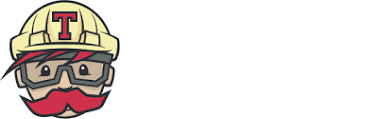

As with test frameworks, a large number of CI solutions exist. We will introduce a web-based framework called [Travis-CI](travis-ci.com), which interacts nicely with GitHub.

Travis is configured from a file called `.travis.yml` in the root directory of the Github repository. This is another example of a YAML file, similar to the `environment.yml` file used for `conda` dependencies. [In this case](https://github.com/jrper/CI), the file looks like

```yml
language: python
python:
  - "3.6"
# command to install dependencies
install:
  - pip install -r requirements.txt
  - pip install .
# command to run tests
script: pytest pytest_example.py
```

Here the first line specifies that we're using python (and thus that travis needs to create a virtual machine running python. The next lines say we want to test python 2.7 as well as python3.6. The `install:` command tells Travis to install extra python packages our code requires using the `pip` package manager. For this repository, our `requirements.txt` file contains only one line:

```txt
numpy>=1.13.0
```

Remember this says that we need a version of `numpy` at 1.13.0 or more recent.

When the Travis tests run they contact GitHub and add a green tick (success) or red cross(failure) beside the commit when it appears. Optionally, by modifying settings one can make a passing Travis result a condition to merge a pull request into the master branch. 

<div class= exercise>

<h4>Exercise:</h4>

Try this yourself:

<ol>
    <li> Fork the <a href="https://github.com/jrper/CI">repository</a> on GitHub.com</li>
    <li> Log into <a href="http://travis-ci.com"> Travis]</a> (which links with your GitHub account).</li>
    <li> Add the Travis GitHub app to your new repository.</li>
    <li> Trigger a build, (or wait for one to start automatically).</li>
    <li> Add some commits to your fork to break and fix the tests.</li>
    <li> Add the docstring and unittest tests to the <code>.travis.yml</code> file.</li>
</ol>

</div>

## Extending CI tests

There are several things that can be added into the automated CI testing by editting the `.travis.yml` file:
- Check coding Standards :- Test for `pep8`/`pylint` errors by running the tools on the code. Both of them return a failing error code by default if they detect any issues with the code base, which means they can easily be hooked into the tests. 
- Documentation Standards :- If any pregenerated manuals/reference pdfs are created, make sure that they are up to date with the code. We can do this by rerunning the documentation tool and make sure it gives the same answer.
- Check examples :- Any examples provided should be included in tests, especially for production code. This is easy for docstrings (use doctests), but for longer tests, you might have to build simplified feature testing.
- Add tools to check [code coverage](https://en.wikipedia.org/wiki/Code_coverage).

<div class= info>

<h4> In this lecture we learned:</h4>

<ul>
    <li>Writing a formal test</li>
    <li>The basics of Test Driven Development</li>
    <li>Automated testing using testing frameworks and py.test</li>
    <li>Continuous Integration using Travis-ci.com</li>
</ul>

</div>

## Further Reading

- The python documentation page on [venv](https://docs.python.org/3.6/library/venv.html)
- A fuller [sphinx tutorial](https://pythonhosted.org/an_example_pypi_project/sphinx.html)
- Python documentaion on [unittest](https://docs.python.org/3/library/unittest.html) and [doctest](https://docs.python.org/3/library/doctest.html).
- Pytest [documentation](https://pytest.readthedocs.io/en/latest/).
- A software carpentry [lecture](https://intermediate-and-advanced-software-carpentry.readthedocs.io/en/latest/testing-python.html) on testing.
- [Travis-ci.com tutorials](https://docs.travis-ci.com).

In [16]:
# This cell sets the css styles for the rest of the notebook.
# Unless you are particlarly interested in that kind of thing, you can safely ignore it

from IPython.core.display import HTML

def css_styling():
    styles = """<style>
div.warn {    
    background-color: #fcf2f2;
    border-color: #dFb5b4;
    border-left: 5px solid #dfb5b4;
    padding: 0.5em;
    }

div.exercise {    
    background-color: #B0E0E6;
    border-color: #B0E0E6;
    border-left: 5px solid #1E90FF;
    padding: 0.5em;
    }

div.info {    
    background-color: #F5F5DC;
    border-color: #F5F5DC;
    border-left: 5px solid #DAA520;
    padding: 0.5em;
    }

div.interlude {    
    background-color: #E6E6FA;
    border-color: #E6E6FA;
    border-left: 5px solid #4B0082;
    padding: 0.5em;
    }
    
div.assessment {    
    background-color: #98FB98;
    border-color: #228B22;
    border-left: 5px solid #228B22;
    padding: 0.5em;
    }

 </style>
"""
    return HTML(styles)
css_styling()